/Users/ilalucnikov/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/Users/ilalucnikov/miniconda3/lib/python3.7/site-packages/matplotlib/legend.py:937: UserWarning: Legend does not support '$' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/Users/ilalucnikov/miniconda3/lib/python3.7/site-packages/matplotlib/legend.py:937: UserWarning: Legend does not support '1' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/Users/ilalucnikov/miniconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family 

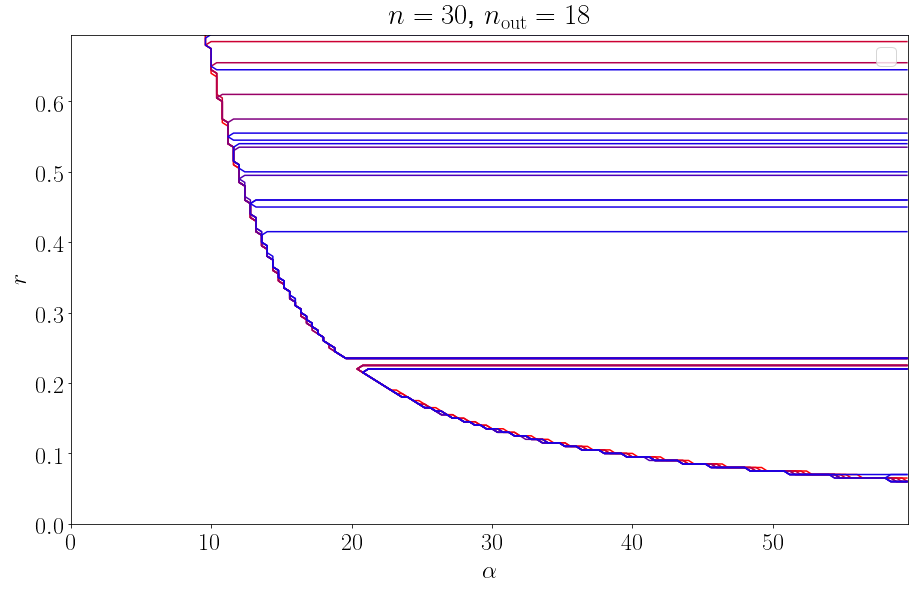

In [2]:
import mf_mdp as mm

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':24})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('xtick', labelsize=24)
rc('ytick', labelsize=24)


############
#parameters
############
dr = 0.005
dif = np.arange(0.01,0.11,0.01)
dalpha = 0.4
max_alpha = 60
max_r = 0.7
n= 30
q = 9
############
############
coef = 0
y = np.arange(0, max_r, dr)
fig = plt.figure()
fig.set_size_inches(15., 9.)
for epsilon in dif:

    r = 0.
    flags = np.empty((1, int(max_alpha/dalpha)), dtype=np.float64)
    for k in range(int(max_r/dr)):
    
        model = mm.mf_mdp_model(n = n, q = q, epsilon = epsilon, alpha = 4., r = r)
        re_lambdas, im_lambdas, x = model.relax_constant_tracking(max_alpha, dalpha)
        flag = (re_lambdas[:,1:]<0).sum(1)
        flags = np.append(flags, np.expand_dims(flag, axis=0), axis=0)
        r = r + dr
    flags = flags[1:]

    #x_a = np.arange(0, 60, 1)
    #y_a = (n - 1)/((q - 1)*(1 + x_a))

    #drawing plot
    #ax.ylim(top = 0.695)
    plt.contour(x, y, flags, [0], colors = [np.array((1.,0.,0.)) + (coef/10)*np.array((-1.,0.,1.))])
    #plt.plot(x_a, y_a, 'k')
    coef = coef + 1
plt.legend(r'$1$',r'$2$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$r$')
plt.title(r'$n=30$, $n_{\rm out}=18$')
plt.savefig('Stable_unstable_frontier_vs_epsilon.pdf')